## I-94 Traffic Data Analysis

Magnus Skonberg | January 18th 2022

### Project Intro

The purpose of this project is to apply exploratory and explanatory data visualization principles in analyzing I-94 interstate westbound traffic data.

The dataset was made available by John Hogue on the UCI Machine Learning Repository [here]. A station located approximately midway between Minneapolis and Saint Paul recorded the traffic data (see dataset docs). The traffic direction under consideration is westbound. With these two points in mind (location and direction), we mustn't generalize for the whole of I-94. *Our findings apply for that particular section and direction.*

The purpose of this project will be to determine a few key indicators of heavy traffic on I-94. These indicators may be time of day, time of week, weather, etc.

Let's begin and see where the analysis leads!

### Load Data

To start we read in our data:

In [1]:
import pandas as pd

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
#traffic.head()
#traffic.tail()
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Observing the first 5, last 5 and column info we extend that:
1. We're dealing with a 48203 x 9 dataset.
2. There's no NULL presence.
3. We have hourly data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.
4. All columns aside from `date_time` appear to be of the proper time. We'll have to convert this column.

### Analyzing Traffic Volume

To start we interpret traffic volume via histogram and basic stats:

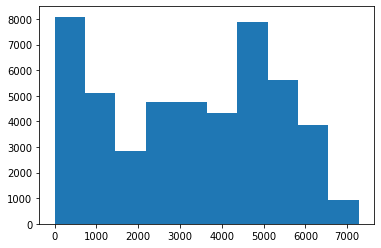

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(traffic['traffic_volume'])
plt.show()

In [3]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In just considering traffic volume in the above histogram and statistics, we can extend that:
* traffic volume peaks with ~8000 instances of ~0 and ~5000 vehicles,
* 25% of traffic flow is < 1193 vehicles,
* 50% of traffic flow is between 1193 and 4933 vehicles, and 
* 25% of traffic flow is > 4933 vehicles.

I hypothesize that time of day is strongly correlated with traffic patterns.

### Comparing Day vs. Night Traffic Patterns

To start, we divide our data into two parts:
1. Daytime data: 7am - 7pm (12 hours)
2. Nighttime data: 7pm - 7am (12 hours)

While imperfect, this simple split of our data allows us to compare traffic patterns based on time of day.

In [4]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

time_of_day = []

#isolate day v night time data
for hour in traffic['date_time'].dt.hour:
    if (hour >= 7 and hour < 19):
        time_of_day.append('day')
    else:
        time_of_day.append('night')

traffic['time_of_day'] = time_of_day

day_traffic = traffic[traffic['time_of_day'] == 'day']
night_traffic = traffic[traffic['time_of_day'] == 'night']

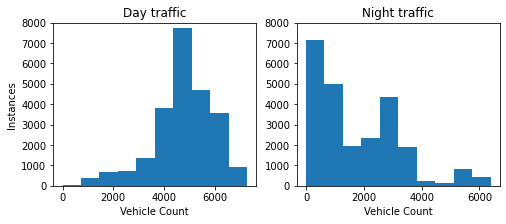

In [5]:
plt.figure(figsize=(8,3))

plt.subplot(1, 2, 1)
plt.hist(day_traffic['traffic_volume'])
plt.title('Day traffic')
plt.xlabel('Vehicle Count')
plt.ylabel('Instances')
plt.ylim(0,8000)

plt.subplot(1, 2, 2)
plt.hist(night_traffic['traffic_volume'])
plt.title('Night traffic')
plt.xlabel('Vehicle Count')
plt.ylim(0,8000)
plt.show()

In [6]:
day_traffic['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [7]:
night_traffic['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

From the histograms and stats above we observe:
* a left skewed, near normal distribution for daytime traffic
* a right skewed, non normal distribution for nighttime traffic


**Takeaway:** there's significantly more traffic during the day.

Being that traffic is light at night, and our goal is to find indicators of heavy traffic, we'll focus on daytime data.

### Time Indicators

Being that time is one of the most promising indicators of traffic, we'll cut it 3 ways: month, day of week, and time of day. We'll consider time plots for each of the preceding time indicators:

<ipython-input-8-48ddc6172d89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_traffic['month'] = day_traffic['date_time'].dt.month


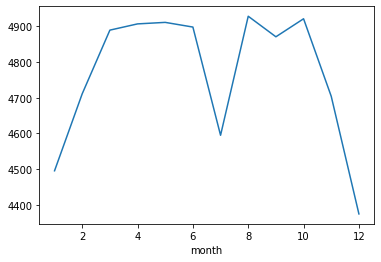

In [8]:
day_traffic['month'] = day_traffic['date_time'].dt.month
by_month = day_traffic.groupby('month').mean()
by_month['traffic_volume'].plot(kind='line')
plt.show()

Observations regarding monthly traffic:
* lower than average volume through the winter (November - February)
* relatively stable volume through the warmer months (March - October)
* anomalous low volume in July

**Takeaway:** traffic is heavier during the warmer months aside from July.

<ipython-input-9-66c1dc0f8fbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_traffic['dayofweek'] = day_traffic['date_time'].dt.dayofweek


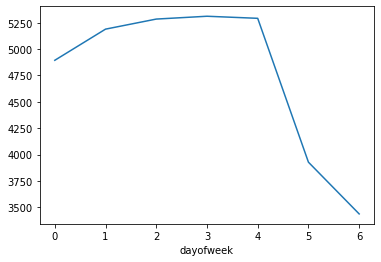

In [9]:
day_traffic['dayofweek'] = day_traffic['date_time'].dt.dayofweek
by_dayofweek = day_traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot(kind='line') #0 = Monday, 6 = Sunday
plt.show()

Observations regarding day of the week traffic:
* traffic steadily increases Monday - Thursday
* traffic declines slightly on Friday and dramatically Saturday into Sunday

**Takeaway:** traffic is heavier during business days.

<ipython-input-10-9d1c25933b53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_traffic['hour'] = day_traffic['date_time'].dt.hour


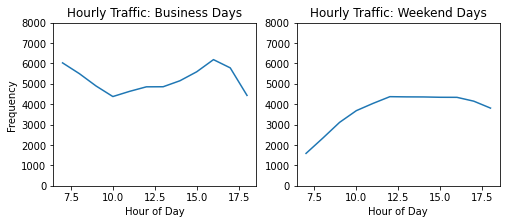

In [10]:
day_traffic['hour'] = day_traffic['date_time'].dt.hour
business_days = day_traffic.copy()[day_traffic['dayofweek'] <= 4] # 4 == Friday
weekend = day_traffic.copy()[day_traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(8,3))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot(kind='line') #0 = Monday, 6 = Sunday
plt.title('Hourly Traffic: Business Days')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.ylim(0,8000)

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot(kind='line') #0 = Monday, 6 = Sunday
plt.title('Hourly Traffic: Weekend Days')
plt.xlabel('Hour of Day')
plt.ylim(0,8000)
plt.show()

Observations regarding hourly traffic:
* on business days traffic decreases 7am - 10am then increases through 4pm prior to tapering off again
* on weekend days traffic increases 8am through 12pm, stabilizes until ~5pm and then begins to taper off.

**Takeaway:** traffic is heaviest early in the morning and early in the evening on business days vs. middle of the day on weekends.

To summarize all of our findings regarding time and traffic:
1. there's significantly more traffic during the day.
2. traffic is heavier during the warmer months aside from July.
3. traffic is heavier during business days.
4. traffic is heaviest early in the morning and early in the evening on business days vs. middle of the day on weekends.

### Weather Indicators

Another possible indicator of heavy traffic is weather. As such, as a next step we'll consider the weather-related columns (`temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`) and their relationship with traffic volume.

We start with the numerical columns and consider correlation values with `traffic_volume`:

In [11]:
# Find the correlation between traffic_volume and the numerical weather columns
## temp, rain_1h, snow_1h, clouds_all
traffic.corr()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


`temp` (temperature) is most strongly correlated with `traffic_volume`.

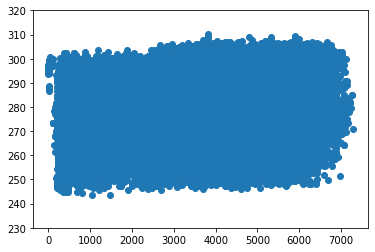

In [12]:
# Plot a scatter plot for this weather column and traffic_volume
plt.scatter(traffic['traffic_volume'], traffic['temp'])
plt.ylim(230, 320) # set axis bounds to zoom in on data of interest
plt.show()

We do not find reliable indicators of heavy traffic in the above weather columns.

### Weather Types

To see if we can find more useful data, we'll look next at the categorical weather-related columns (`weather_main` and `weather_description`):

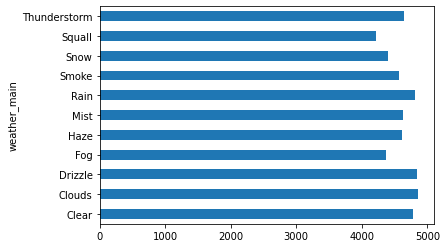

In [13]:
by_weather_main = day_traffic.groupby('weather_main').mean()
by_weather_description = day_traffic.groupby('weather_description').mean()

# Plot a horizontal bar plot for the traffic_volume column of by_weather_main
by_weather_main['traffic_volume'].plot(kind='barh') #0 = Monday, 6 = Sunday
plt.show()

There is no traffic volume exceeding 5000 cars and no clear indicator of greater traffic based on weather types.

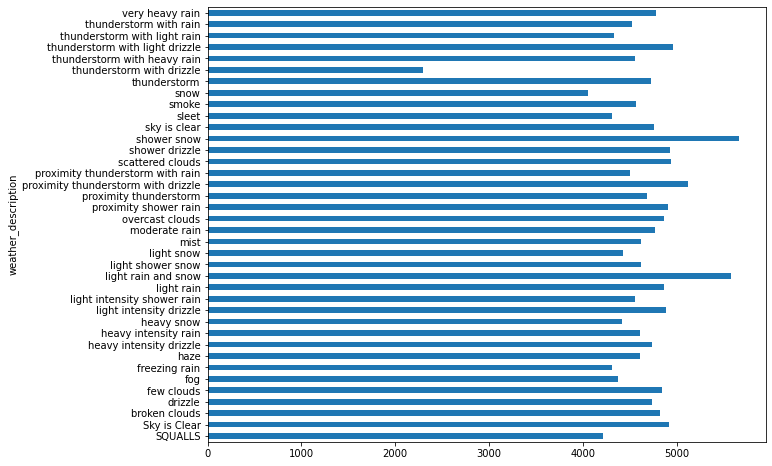

In [14]:
plt.figure(figsize=(10,8))
by_weather_description['traffic_volume'].plot(kind='barh') #0 = Monday, 6 = Sunday
plt.show()

There are two leading indicators of heavy traffic (> 5000 vehicles).
1. snow shower and
2. light rain and snow.

These are "moderate" weather patterns and so on the surface it may not make sense why their correlated with heavier traffic. One reason could be that because the weather's not that bad, people take their vehicles out, get into accidents, and then because there are more people on the road traffic can build.

### Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to uncover 2 types:

**Time indicators**
* traffic is heavier during the warmer months (aside from July).
* traffic is heavier during business days.
* traffic is heaviest early in the morning and early in the evening on business days vs. middle of the day on weekends.

**Weather indicators**
* Shower snow
* Light rain and snow